# Trabalho de Conclusão de Curso - Ciência de Dados e Machine Learning

### Participantes
* ### Marcelo Aragão
* ### Pedro Ingro Kallmon da Silva Pereira dos Santos

### Professor
* ### Fabio Oliveira Guimarães

## 1-  Determinar Objetivos de Negócio e Avaliar a Situação

### 1.1 - Avaliação da Situação Atual

#### 1.1.1- Inventário de Recursos

##### **Integrantes**
São dois alunos da pós-graduação
* Pedro Ingro é um engenheiro/analista de dados
* Marcelo é um arquiteto de sistemas.

##### **Dados**
* Existem dois conjuntos de dados fornecidos pelo estudo de Moro et al. (2011): "bank-full.csv" e "bank.csv".
* O primeiro contém todos os exemplos ordenados por data, enquanto o segundo é uma amostra de 10% dos exemplos selecionados aleatoriamente do primeiro conjunto.
* Os conjuntos de dados incluem informações detalhadas sobre clientes bancários, como idade, profissão, estado civil, educação, saldo médio anual, entre outros.
* Será utilizado o csv com os dados completos

##### **Recursos Computacionais**
* Há acesso a um cluster de computação de alto desempenho que pode ser utilizado para processamento paralelo e execução de algoritmos de machine learning computacionalmente intensivos.
Cada membro da equipe possui um computador pessoal com capacidade de processamento suficiente para análise de dados e desenvolvimento de modelos.

##### **Software**
* Serão utilizadas uma variedade de ferramentas de software para análise de dados e modelagem estatística, incluindo Python com bibliotecas como Pandas, NumPy, Scikit-learn e TensorFlow, além de ferramentas de visualização de dados como Matplotlib e Seaborn.

#### 1.1.2 - Requisitos, Suposições e Restrições


##### **Requisitos do Projeto**
* O projeto tem um prazo definido para conclusão, estabelecido em 05/05/2024.
* É necessário garantir que os resultados da análise de dados sejam compreensíveis e de alta qualidade, atendendo aos padrões de precisão e confiabilidade estabelecidos.

##### **Preocupações com Segurança de Dados e Questões Legais**
* É fundamental garantir a segurança dos dados do cliente durante todo o processo de análise. Todas as diretrizes e regulamentos de privacidade de dados devem ser rigorosamente seguidos para evitar violações de privacidade ou questões legais.
* Questões legais relacionadas à privacidade de dados, consentimento do cliente e conformidade com regulamentações, como GDPR, devem ser consideradas e abordadas adequadamente.

##### **Suposições do Projeto**
* As suposições feitas pelo projeto incluem a expectativa de que os dados fornecidos sejam precisos e representativos do comportamento dos clientes.
* Outras suposições podem incluir a hipótese de que certas variáveis têm influência significativa nas decisões de investimento dos clientes, como idade, saldo médio anual e histórico de interações com o banco.

##### **Restrições do Projeto**
* As principais restrições incluem recursos limitados de tempo e pessoal, o que pode afetar a profundidade e amplitude da análise.
* Restrições orçamentárias podem limitar a capacidade de adquirir ferramentas de software adicionais ou contratar consultores externos.

### 1.2 - Saídas Desejadas do Projeto


##### Critérios de Sucesso de Mineração de Dados
* Os critérios de sucesso de mineração de dados estão relacionados à precisão e eficácia dos modelos preditivos desenvolvidos. Isso inclui alcançar uma alta taxa de precisão na previsão de se um cliente investirá a prazo com base nas variáveis disponíveis.
* Outros critérios podem incluir a capacidade dos modelos em identificar padrões e insights úteis nos dados que possam ser aplicados para melhorar as estratégias de marketing.

### 1.3 - Quais Perguntas Estamos Tentando Responder?



* Quais são os principais fatores que influenciam a decisão de um cliente investir a prazo no banco português?
* Quais são os melhores métodos de modelagem para prever com precisão se um cliente investirá a prazo com base em suas características demográficas e comportamentais?
* Qual é o impacto esperado das variáveis ​​específicas, como idade, saldo médio anual e histórico de interações com o banco, na probabilidade de um cliente investir a prazo?

## 2 - Compreensão dos Dados






### 2.1 - Relatório Inicial de Dados

In [13]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler, OneHotEncoder, LabelEncoder

import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
bank_full = pd.read_csv('/content/drive/MyDrive/bank-full.csv', sep=';', header='infer')

### 2.2 - Descrição dos Dados

In [ ]:
print(f"O dataset possui {len(bank_full)} linhas e {len(bank_full.columns)} colunas")

O dataset possui 45211 linhas e 17 colunas


In [ ]:
bank_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
bank_full.shape

(45211, 17)

In [ ]:
bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 2.3 - Verificando a Qualidade dos Dados


#### 2.3.1 - Tratando os Dados para Análises

In [12]:
# Lista de colunas que serão convertidas para o tipo inteiro
dtype_columns = ['age', 'balance', 'duration']

# Loop através das colunas especificadas na lista 'dtype_columns'
for col in dtype_columns:
    # Converte cada coluna para o tipo inteiro
    bank_full[col] = bank_full[col].astype('int')

In [ ]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### 2.3.2 - Dados Faltantes ou Inconsistentes


In [5]:
def count_nulls_function(df):
    # Calcula a contagem de valores nulos para cada coluna no DataFrame
    count_nulls = df.isnull().sum()

    # Filtra as colunas que têm valores nulos
    list_null = count_nulls[count_nulls > 0]

    # Verifica se a lista não está vazia, ou seja, se existem colunas com valores nulos
    if len(list_null) != 0:
        # Exibe as colunas que têm valores nulos e suas contagens
        print(list_null)
    else:
        # Mensagem informando que não há valores nulos no DataFrame
        print('Dataset não possui nulos')

In [6]:
count_nulls_function(bank_full)

Dataset não possui nulos


### 2.4 Exploração de Dados Iniciais


#### 2.4.1 Distribuição e Análises


In [ ]:
# Dicionários de tradução para cada variável categórica
job_translation = {
    "admin.": "administrador",
    "unknown": "desconhecido",
    "unemployed": "desempregado",
    "management": "gestão",
    "housemaid": "empregada doméstica",
    "entrepreneur": "empresário",
    "student": "estudante",
    "blue-collar": "operário",
    "self-employed": "autônomo",
    "retired": "aposentado",
    "technician": "técnico",
    "services": "serviços"
}

marital_translation = {
    "married": "casado",
    "divorced": "divorciado",
    "single": "solteiro"
}

education_translation = {
    "unknown": "desconhecido",
    "secondary": "secundário",
    "primary": "primário",
    "tertiary": "terciário"
}

default_translation = {
    "yes": "sim",
    "no": "não"
}

housing_translation = {
    "yes": "sim",
    "no": "não"
}

loan_translation = {
    "yes": "sim",
    "no": "não"
}

contact_translation = {
    "unknown": "desconhecido",
    "telephone": "telefone",
    "cellular": "celular"
}

month_translation = {
    "jan": "janeiro", "feb": "fevereiro", "mar": "março", "apr": "abril",
    "may": "maio", "jun": "junho", "jul": "julho", "aug": "agosto",
    "sep": "setembro", "oct": "outubro", "nov": "novembro", "dec": "dezembro"
}

poutcome_translation = {
    "unknown": "desconhecido",
    "other": "outro",
    "failure": "falha",
    "success": "sucesso"
}

y_target = {
    "no": "Não",
    "yes": "Sim"
}

In [ ]:
bank_full_pandas = bank_full.copy(deep = True)

# Aplicando as traduções
pandas_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
pandas_dict = [job_translation, marital_translation, education_translation, default_translation, housing_translation,
               loan_translation, contact_translation, month_translation, poutcome_translation, y_target]

for col, map_list in zip(pandas_columns, pandas_dict):
  bank_full_pandas[col] = bank_full_pandas[col].map(map_list).str.title()


<Figure size 600x400 with 0 Axes>

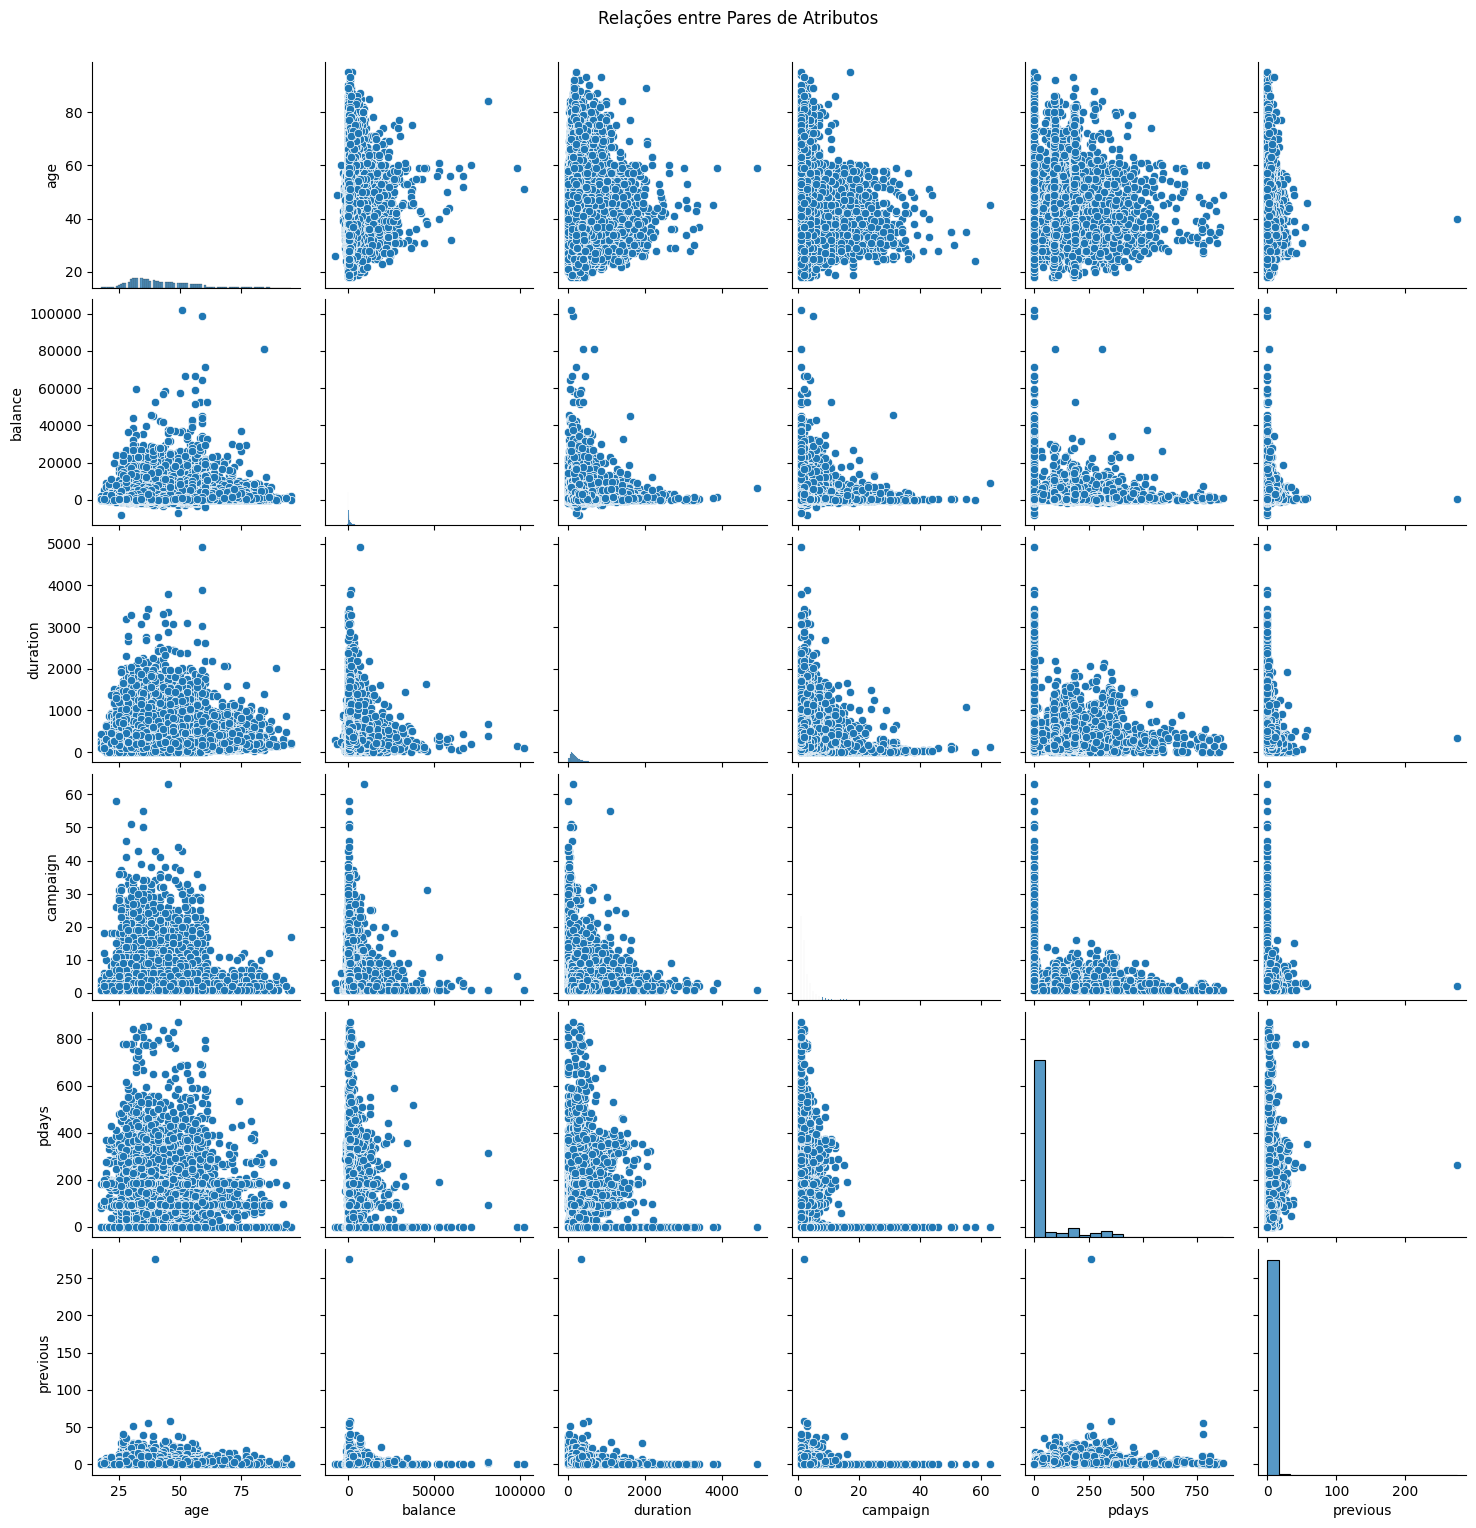

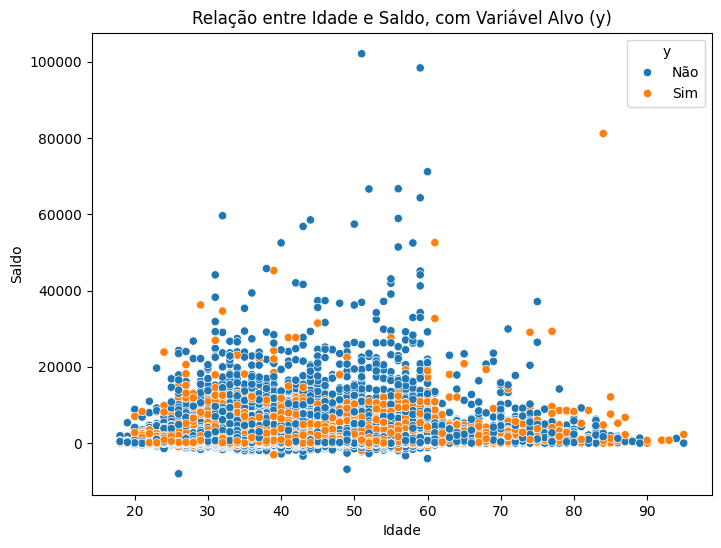

In [ ]:
# Distribuição da variável alvo (y)
plt.figure(figsize=(6, 4))
# Relações entre pares de atributos
sns.pairplot(bank_full_pandas[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])
plt.suptitle('Relações entre Pares de Atributos', y=1.02)
plt.show()

# Gráfico de dispersão para investigar uma relação específica
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='balance', hue='y', data=bank_full_pandas)
plt.title('Relação entre Idade e Saldo, com Variável Alvo (y)')
plt.xlabel('Idade')
plt.ylabel('Saldo')
plt.show()

In [ ]:
# Resultados de agregações simples
print("Média de idade:", bank_full_pandas['age'].mean())
print("Média de saldo:", bank_full_pandas['balance'].mean())

# Análises estatísticas simples
print("Descrição estatística do DataFrame:")
print(bank_full_pandas.describe())

Média de idade: 40.93621021432837
Média de saldo: 1362.2720576850766
Descrição estatística do DataFrame:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000

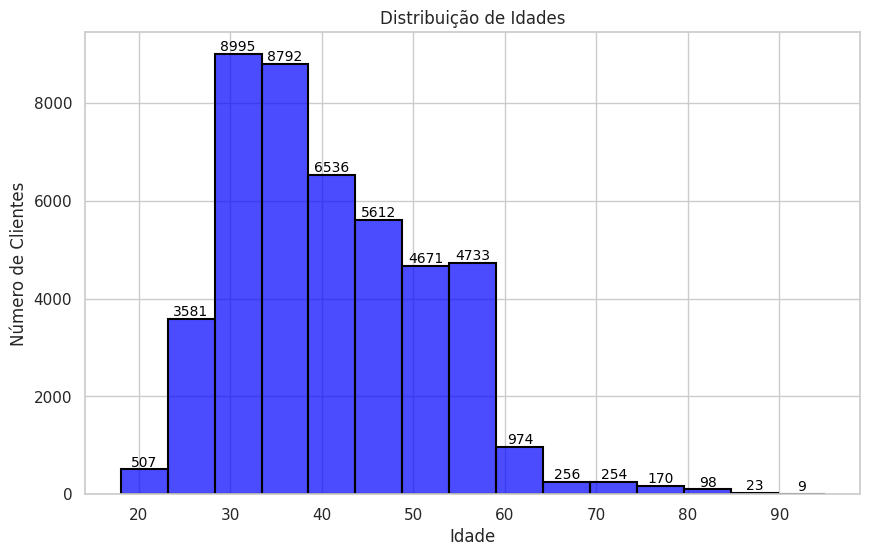

In [ ]:
# Configurando o estilo do Seaborn para incluir grid
sns.set(style='whitegrid')

# Criando o histograma com Seaborn
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=bank_full_pandas, x='age', bins=15, color='blue', alpha=0.7, edgecolor='black', linewidth=1.5)

# Configurando títulos e labels
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')

# Adicionando os números em cima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

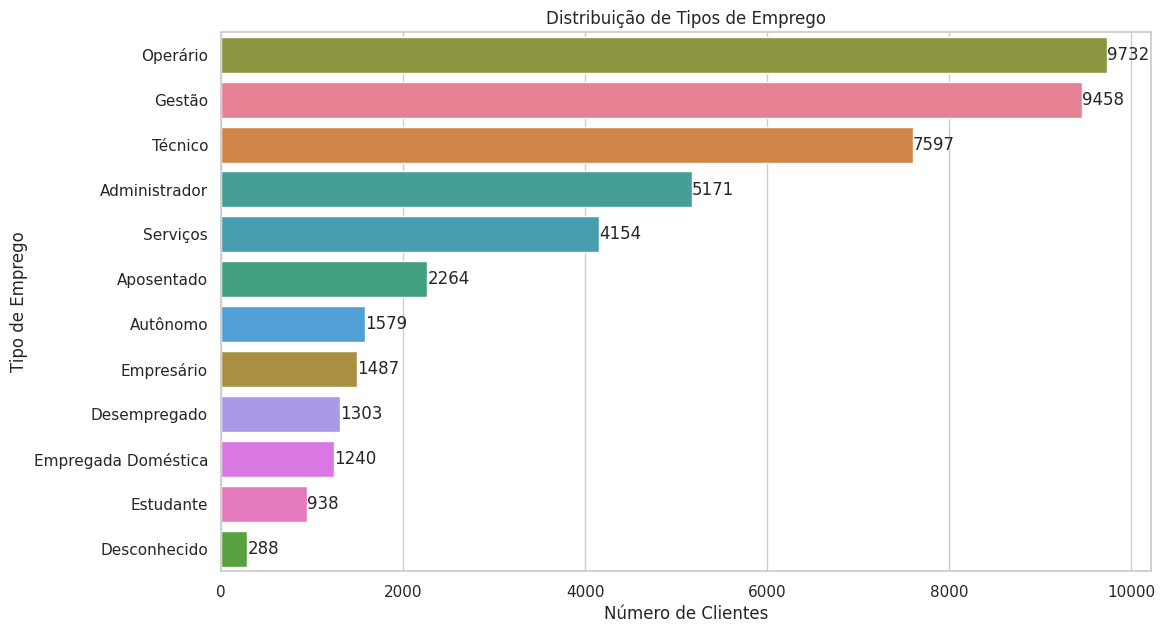

In [ ]:
# Gráfico de barras para tipos de emprego
sns.set(style="whitegrid")  # Configura o estilo com linhas de grade
job_counts = bank_full_pandas['job'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
ax = sns.countplot(y='job', data=bank_full_pandas, order=job_counts.index, hue='job', legend=False)
plt.title('Distribuição de Tipos de Emprego')
plt.xlabel('Número de Clientes')
plt.ylabel('Tipo de Emprego')

# Adicionando as quantidades em cada barra
for p in ax.patches:
    width = p.get_width()    # Obtém a largura da barra
    plt.text(x=width + 3,    # Posiciona o texto um pouco à direita da barra
             y=p.get_y() + p.get_height() / 2,  # Centraliza verticalmente
             s=int(width),  # Texto a ser exibido
             va='center')  # Alinhamento vertical

plt.show()

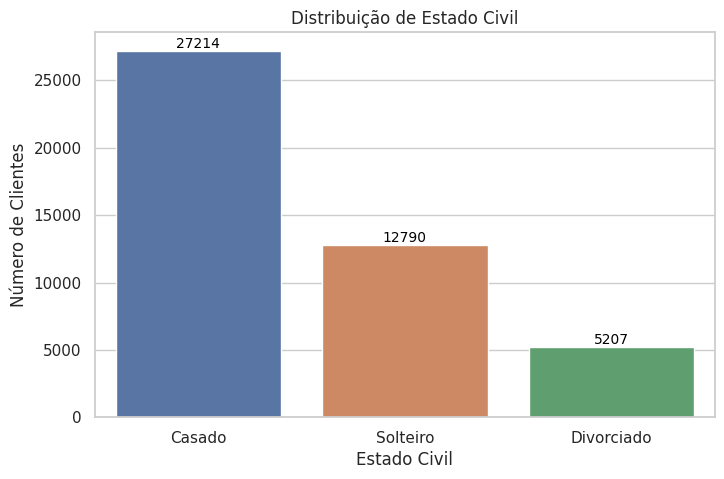

In [ ]:
# Criando o gráfico de barras para estado civil
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='marital', data=bank_full_pandas, hue='marital', legend=False)

# Configurando títulos e labels
plt.title('Distribuição de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')

# Adicionando os números em cima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

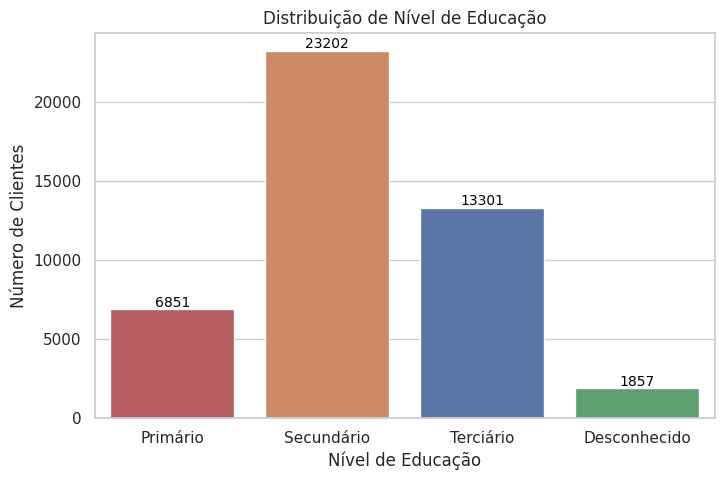

In [ ]:
# Supondo que seu DataFrame seja 'df'
# Criando o gráfico de barras para nível de educação
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='education', data=bank_full_pandas, order=['Primário', 'Secundário', 'Terciário', 'Desconhecido'], hue = 'education', legend=False)

# Configurando títulos e labels
plt.title('Distribuição de Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Número de Clientes')

# Adicionando os números em cima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

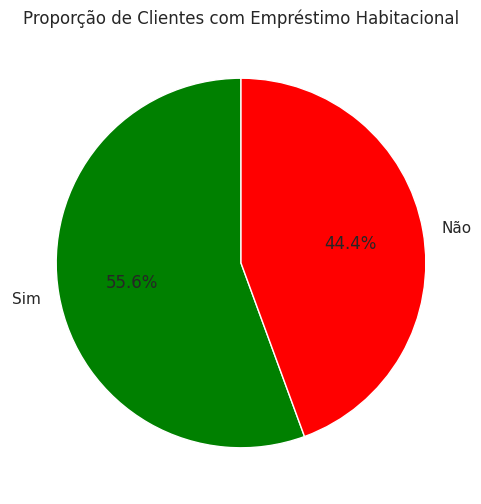

In [ ]:
# Gráfico de pizza para empréstimo habitacional
plt.figure(figsize=(6, 6))
bank_full_pandas['housing'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Proporção de Clientes com Empréstimo Habitacional')
plt.ylabel('')
plt.show()

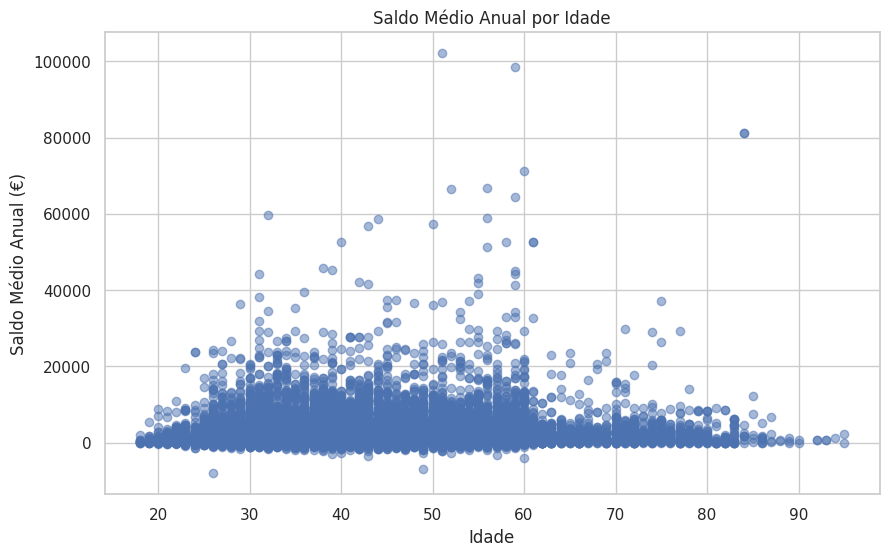

In [ ]:
# Gráfico de dispersão para saldo médio anual por idade
plt.figure(figsize=(10, 6))
plt.scatter(bank_full_pandas['age'], bank_full_pandas['balance'], alpha=0.5)
plt.title('Saldo Médio Anual por Idade')
plt.xlabel('Idade')
plt.ylabel('Saldo Médio Anual (€)')
plt.show()

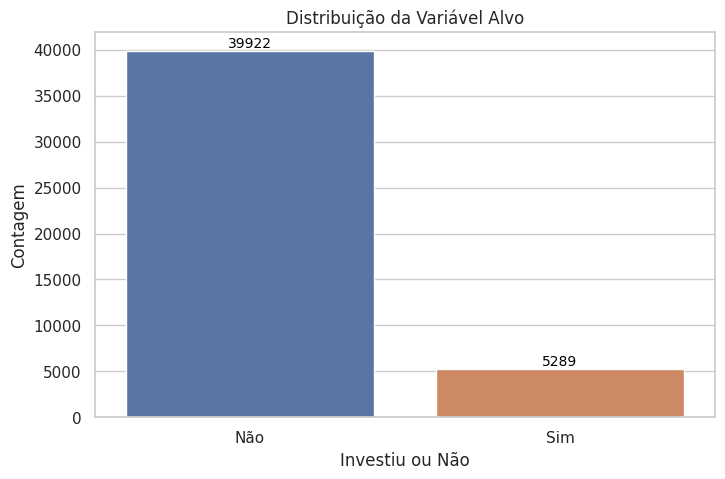

In [ ]:
# Supondo que seu DataFrame seja 'df'
# Criando o gráfico de barras para nível de educação
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='y', data=bank_full_pandas, hue = 'y', legend=False)

# Adicionando os números em cima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Configurando o título e rótulos dos eixos
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Investiu ou Não')
plt.ylabel('Contagem')

plt.show()

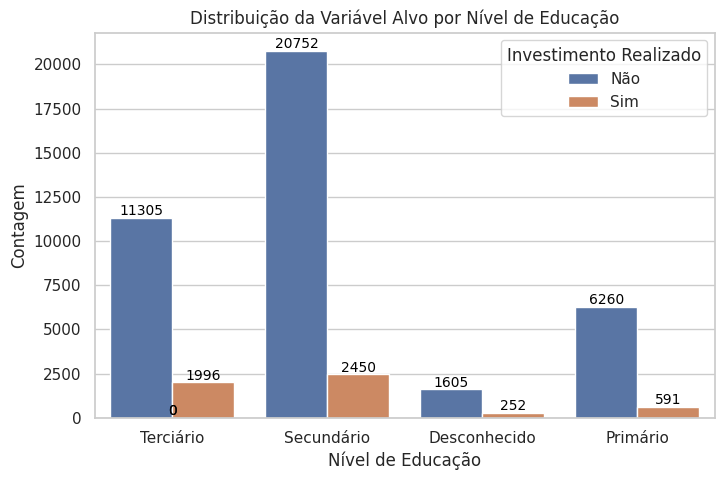

In [ ]:
# Criando o gráfico de barras para nível de educação
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='education', data=bank_full_pandas, hue='y')

# Adicionando os números em cima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Configurando o título e rótulos dos eixos
plt.title('Distribuição da Variável Alvo por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')

# Exibindo o gráfico
plt.legend(title='Investimento Realizado', labels=['Não', 'Sim'], loc='upper right')
plt.show()

### 2.5 - Relatório de Análises

##### **Desbalanceamento da Classe Alvo**
* Um dos principais desafios identificados neste estudo é o desbalanceamento significativo na classe alvo do nosso conjunto de dados. Com 39922 registros para "Não" e apenas 5289 para "Sim", é evidente que há uma disparidade que pode afetar a capacidade do modelo em prever com precisão a subscrição de depósitos a prazo. A resolução deste desequilíbrio será uma prioridade durante a construção do modelo.

##### Preferências de Investimento por Nível de Educação
* Uma análise inicial revelou uma correlação interessante entre o nível de educação dos clientes e sua propensão a investir em depósitos a prazo. Clientes com formação terciária ou secundária parecem estar mais inclinados a investir, sugerindo a importância do nível educacional na tomada de decisões financeiras. Essa descoberta pode orientar estratégias de marketing mais eficazes e personalizadas.

##### Identificação de Outliers Relacionados à Idade e Saldo Anual
* Durante a análise exploratória dos dados, foram observados outliers notáveis, especialmente na relação entre idade e saldo anual. Esses outliers, concentrados na faixa etária entre 50 e 70 anos, merecem uma investigação mais aprofundada para determinar sua natureza e impacto nos resultados do modelo. Tratar esses pontos discrepantes adequadamente é essencial para garantir a robustez e precisão do modelo.

##### Perfil Demográfico dos Clientes: Financiamento Imobiliário e Estado Civil
* A análise dos dados revelou que a maioria dos clientes entrevistados possui financiamento imobiliário e é casada. Essas informações sobre o perfil demográfico dos clientes são cruciais para entender o contexto mais amplo em que as decisões financeiras são tomadas. Esses insights podem ser úteis para ajustar as estratégias de marketing e os recursos do modelo para melhor atender às necessidades e preferências dos clientes.

### 2.6 - Relatório de Qualidade dos Dados

Existe um desbalanceamento entre os entrevistados em que a maioria das pessoas entrevistadas pretendem não investir. Isso será tratado ao longo do pré processamento com táticas de balancamento de dados utilizando bibliotecas como o SMOTE do inbalanced learn.

Devido a incapacidade de descobrir o motivo dos outliers, eu decidi deixa-los após avaliar a não interferência deles no modelo

## 3 - Preparação dos Dados

#### 3.1 - Label Encoder

In [25]:
bank_full_indexer = bank_full.copy(deep = True)

# Selecionar as colunas categóricas que você deseja codificar
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'campaign']

# Criar um dicionário para armazenar os LabelEncoders para cada coluna categórica
label_encoders = {}

# Criar e aplicar o LabelEncoder para cada coluna categórica
for column in categorical_columns:
    label_encoder = LabelEncoder()
    bank_full_indexer[column] = label_encoder.fit_transform(bank_full_indexer[column])
    label_encoders[column] = label_encoder

bank_full_indexer["y"] = bank_full_indexer["y"].map({"no": 0, "yes": 1})

In [26]:
bank_full_indexer.drop(['day', 'month', 'contact'], axis = 1, inplace = True)
bank_full_indexer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   duration   45211 non-null  int64
 9   campaign   45211 non-null  int64
 10  pdays      45211 non-null  int64
 11  previous   45211 non-null  int64
 12  poutcome   45211 non-null  int64
 13  y          45211 non-null  int64
dtypes: int64(14)
memory usage: 4.8 MB


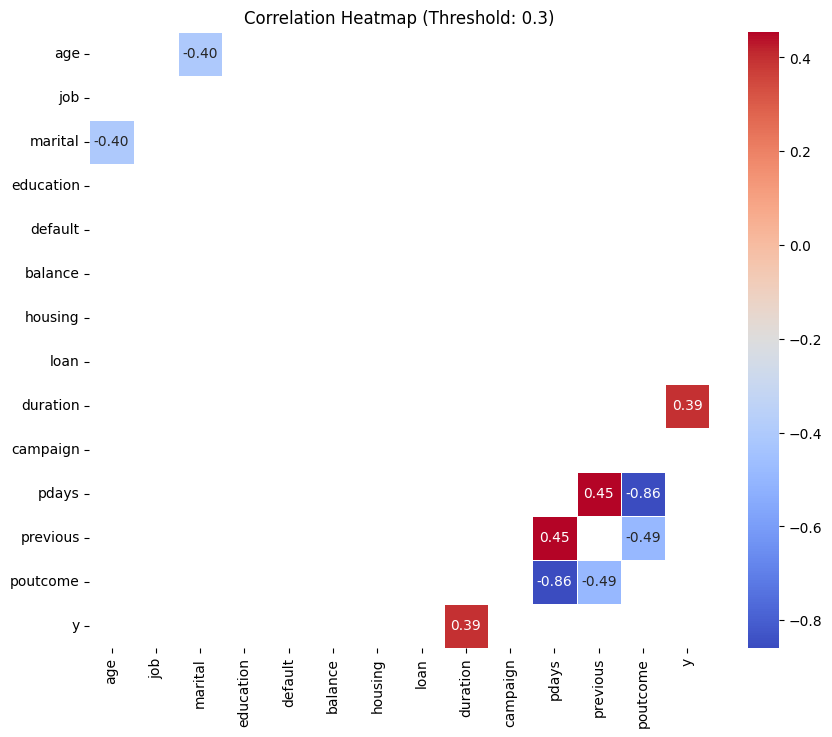

In [27]:
# Calculando a matriz de correlação
correlation_matrix = bank_full_indexer.corr()

# Filtrando os valores de correlação acima de 0.3 ou abaixo de -0.3
filtered_correlation_matrix = correlation_matrix[((correlation_matrix >= 0.3) | (correlation_matrix <= -0.3)) & (correlation_matrix != 1)]

# Plotando o heatmap da matriz de correlação filtrada
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Threshold: 0.3)')
plt.show()

#### 3.2 - SMOTE

In [28]:
# Separação de features e target (suponha 'target' como a coluna alvo)
X = bank_full_indexer.drop('y', axis=1)
y = bank_full_indexer['y']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Criar um novo DataFrame Pandas com dados resampled
bank_full_resampled = pd.DataFrame(X_resampled, columns=X.columns)
bank_full_resampled['y'] = y_resampled

bank_full_indexer = bank_full_resampled

In [29]:
bank_full_indexer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79844 entries, 0 to 79843
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        79844 non-null  int64
 1   job        79844 non-null  int64
 2   marital    79844 non-null  int64
 3   education  79844 non-null  int64
 4   default    79844 non-null  int64
 5   balance    79844 non-null  int64
 6   housing    79844 non-null  int64
 7   loan       79844 non-null  int64
 8   duration   79844 non-null  int64
 9   campaign   79844 non-null  int64
 10  pdays      79844 non-null  int64
 11  previous   79844 non-null  int64
 12  poutcome   79844 non-null  int64
 13  y          79844 non-null  int64
dtypes: int64(14)
memory usage: 8.5 MB


In [30]:
Y = bank_full_indexer["y"]
bank_full_indexer.drop(['y'], axis = 1, inplace = True)

#### 3.3 - Scaler

In [31]:
# Colunas para escalonamento
columns_to_scale = ['pdays', 'previous', 'balance', 'duration', 'age']
scalers = [(f"{col}", MinMaxScaler(), [col]) for col in columns_to_scale]

# Configurando o ColumnTransformer para o escalonamento
scaler_transformer = ColumnTransformer(
    transformers=scalers,
    remainder='passthrough'  # Mantém as demais colunas não especificadas no transformer
)

# Criando o pipeline de escalonamento
scaler_pipeline = Pipeline([
    ('scaler', scaler_transformer)
])

In [32]:
scaler_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pdays', MinMaxScaler(), ['pdays']),
                                ('previous', MinMaxScaler(), ['previous']),
                                ('balance', MinMaxScaler(), ['balance']),
                                ('duration', MinMaxScaler(), ['duration']),
                                ('age', MinMaxScaler(), ['age'])])

In [33]:
bank_full_scaler = scaler_pipeline.fit_transform(bank_full_indexer.copy(deep = True))
bank_full_scaler = pd.DataFrame(bank_full_scaler, columns=scaler_pipeline.get_feature_names_out())

In [34]:
for col in bank_full_scaler.columns:
  if 'remainder' in col:
    bank_full_scaler[col] = bank_full_scaler[col].astype(int)

bank_full_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79844 entries, 0 to 79843
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pdays__pdays          79844 non-null  float64
 1   previous__previous    79844 non-null  float64
 2   balance__balance      79844 non-null  float64
 3   duration__duration    79844 non-null  float64
 4   age__age              79844 non-null  float64
 5   remainder__job        79844 non-null  int64  
 6   remainder__marital    79844 non-null  int64  
 7   remainder__education  79844 non-null  int64  
 8   remainder__default    79844 non-null  int64  
 9   remainder__housing    79844 non-null  int64  
 10  remainder__loan       79844 non-null  int64  
 11  remainder__campaign   79844 non-null  int64  
 12  remainder__poutcome   79844 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 7.9 MB


#### 3.4 - One Hot Encoder

In [35]:
def apply_one_hot_encoding(df, columns_to_encode):
    return pd.get_dummies(df, columns=columns_to_encode)

# Colunas para aplicar o One-Hot Encoding
columns_to_encode = [col for col in bank_full_scaler.columns if ('remainder' in col)]

# Aplicar o One-Hot Encoding
df_encoded = apply_one_hot_encoding(bank_full_scaler, columns_to_encode)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79844 entries, 0 to 79843
Data columns (total 82 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pdays__pdays            79844 non-null  float64
 1   previous__previous      79844 non-null  float64
 2   balance__balance        79844 non-null  float64
 3   duration__duration      79844 non-null  float64
 4   age__age                79844 non-null  float64
 5   remainder__job_0        79844 non-null  bool   
 6   remainder__job_1        79844 non-null  bool   
 7   remainder__job_2        79844 non-null  bool   
 8   remainder__job_3        79844 non-null  bool   
 9   remainder__job_4        79844 non-null  bool   
 10  remainder__job_5        79844 non-null  bool   
 11  remainder__job_6        79844 non-null  bool   
 12  remainder__job_7        79844 non-null  bool   
 13  remainder__job_8        79844 non-null  bool   
 14  remainder__job_9        79844 non-null

## 4- Modelos

In [36]:
# Suponha que 'df' é o seu DataFrame e 'target' é a coluna alvo
X = bank_full_scaler
y = Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [37]:
# Suponhamos que 'y' é a coluna de saída e 'X' são as variáveis preditoras
X_lr = df_encoded  # 'y' deve ser o nome da coluna de saída
y_lr = Y  # Este deve ser o alvo, ajuste conforme seu DataFrame

# Dividindo os dados em treino e teste
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

In [38]:
# Inicializando e treinando o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train_lr, y_train_lr)

# Fazendo previsões
y_pred = model.predict(X_test_lr)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test_lr, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.8542175464963366


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Configurando os hiperparâmetros para testar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Valores comuns para C
    'penalty': ['l1', 'l2'],  # Tipos de regularização
    'solver': ['liblinear']  # Solver compatível com as penalidades l1 e l2
}

# Criando o modelo de regressão logística para o GridSearch
logreg = LogisticRegression()

# Configurando o GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Melhor modelo encontrado pelo GridSearchCV
best_model = grid_search.best_estimator_

# Fazendo previsões no conjunto de teste
y_pred = best_model.predict(X_test)

Melhores hiperparâmetros: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# joblib.dump(best_model, 'optimized_logistic_regression_model.joblib')

['optimized_logistic_regression_model.joblib']

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82      7908
         1.0       0.82      0.85      0.83      8061

    accuracy                           0.83     15969
   macro avg       0.83      0.83      0.83     15969
weighted avg       0.83      0.83      0.83     15969



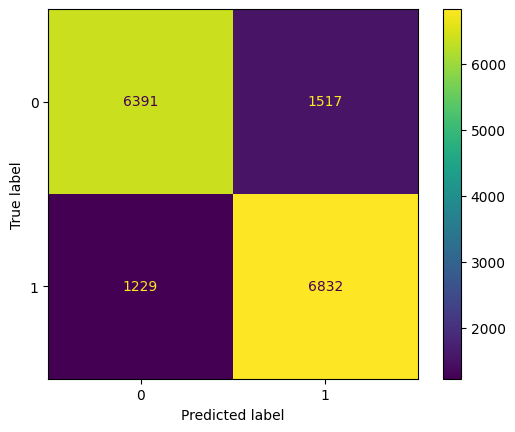

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
break

### Decision Tree

In [39]:
# Criando o modelo de árvore de decisão
dt_classifier = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
# Avaliando o modelo
y_pred = dt_classifier.predict(X_test)

# Imprimindo o relatório de classificação e a matriz de confusão
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7908
           1       0.87      0.89      0.88      8061

    accuracy                           0.87     15969
   macro avg       0.87      0.87      0.87     15969
weighted avg       0.87      0.87      0.87     15969

[[6792 1116]
 [ 903 7158]]


### Random Forets

In [41]:
# Criando o modelo de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)  # n_estimators é o número de árvores

# Treinando o modelo
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [42]:
from sklearn.metrics import classification_report, accuracy_score

# Fazendo previsões no conjunto de teste
y_pred = rf_classifier.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.9091990732043334
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      7908
           1       0.89      0.94      0.91      8061

    accuracy                           0.91     15969
   macro avg       0.91      0.91      0.91     15969
weighted avg       0.91      0.91      0.91     15969



In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Definindo a grade de hiperparâmetros
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Experimentar com 100, 200 e 300 árvores
#     'max_features': ['auto', 'sqrt', 'log2'],  # O número de features a considerar quando procurar a melhor divisão
#     'max_depth': [None, 10, 20, 30],  # A profundidade máxima das árvores
#     'min_samples_split': [2, 5, 10],  # O número mínimo de amostras requeridas para dividir um nó
#     'min_samples_leaf': [1, 2, 4]  # O número mínimo de amostras requeridas em cada folha
# }

# # Configurando o GridSearchCV
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# # Executando o GridSearchCV
# grid_search.fit(X_train, y_train)

# # Melhores parâmetros encontrados
# print("Melhores parâmetros:", grid_search.best_params_)

# # Melhor modelo encontrado pelo GridSearchCV
# best_rf_model = grid_search.best_estimator_

# # Avaliando o melhor modelo
# best_y_pred = best_rf_model.predict(X_test)
# print("Acurácia do melhor modelo:", accuracy_score(y_test, best_y_pred))
# print(classification_report(y_test, best_y_pred))

### Gradient

In [ ]:
# Criando o modelo de Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treinando o modelo
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = gb_classifier.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.86692967624773
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7908
           1       0.85      0.89      0.87      8061

    accuracy                           0.87     15969
   macro avg       0.87      0.87      0.87     15969
weighted avg       0.87      0.87      0.87     15969



### XGboost

In [ ]:
# Criando o modelo XGBoost
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treinando o modelo
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred_xgb = xgb_classifier.predict(X_test)

# Avaliando o modelo
print("Acurácia XGBoost:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Acurácia XGBoost: 0.8459515310914898
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7908
           1       0.83      0.87      0.85      8061

    accuracy                           0.85     15969
   macro avg       0.85      0.85      0.85     15969
weighted avg       0.85      0.85      0.85     15969



## 5 - Conclusão sobre o Modelo Escolhido

### 5.1 - Técnica de Modelagem

Random Forest é um algoritmo de aprendizado de máquina utilizado para classificação e regressão. Ele cria uma "floresta" de árvores de decisão durante o treinamento. Cada árvore na floresta é treinada com uma amostra aleatória do conjunto de dados, e a classificação final é determinada pela maioria dos votos das árvores individuais.

### 5.2 - Conclusões gerada pleo Modelo

#### Independência das Amostras:
* O algoritmo de Random Forest assume que as amostras de treinamento são independentes umas das outras. Isso significa que a presença ou ausência de uma determinada amostra não influencia a presença ou ausência de outras amostras.

#### Distribuições das Variáveis:
* O Random Forest não faz suposições específicas sobre a distribuição das variáveis de entrada. Ele é capaz de lidar com variáveis contínuas, categóricas e ordinais sem a necessidade de pré-processamento adicional.

#### Dados Faltantes:
* O Random Forest é capaz de lidar com dados faltantes sem a necessidade de imputação prévia. Durante a construção das árvores de decisão individuais, o algoritmo considera apenas os atributos disponíveis para cada amostra.

#### Variáveis Categóricas:
* O Random Forest suporta variáveis categóricas, mas geralmente requer que elas sejam codificadas como variáveis dummy ou através de técnicas de codificação apropriadas, como Label Encoding ou One-Hot Encoding.

#### Classe alvo:
* Para problemas de classificação, o Random Forest assume que a classe alvo é categórica. No entanto, ele pode lidar com problemas de regressão quando a classe alvo é contínua.

### 5.3 - Construção do Modelo

Parâmetros Utilizados:

* n_estimators: O número de árvores na floresta. Escolhemos um valor de 300 para garantir robustez e reduzir a chance de overfitting.
* max_depth: A profundidade máxima de cada árvore de decisão. Optamos por não definir um limite explícito para a profundidade das árvores, permitindo que elas cresçam até atingir os mínimos necessários para capturar os padrões nos dados.
* min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno. Definimos este parâmetro como 2 para garantir que os nós internos sejam divididos, desde que contenham mais de uma amostra.
* min_samples_leaf: O número mínimo de amostras necessárias para estar em um nó folha. Escolhemos um valor de 1 para garantir que mesmo os nós folha mais baixos possam fazer previsões.
* random_state: Um valor fixo para garantir a reprodutibilidade dos resultados.

### 5.4 - Resultados

Para interpretar os modelos, levamos em consideração nosso conhecimento de domínio, nossos critérios de sucesso em mineração de dados e o design do teste desejado.

Os resultados da avaliação do modelo Random Forest são os seguintes:

* Acurácia: 0.9092
* Precisão (precision): A precisão para a classe 0 (não) é de 0.93 e para a classe 1 (sim) é de 0.89. Isso significa que, das instâncias classificadas como pertencentes à classe 0, 93% realmente pertencem a essa classe. Da mesma forma, das instâncias classificadas como pertencentes à classe 1, 89% realmente pertencem a essa classe.
* Recall: O recall para a classe 0 é de 0.88 e para a classe 1 é de 0.94. Isso indica que, para a classe 0, o modelo identificou corretamente 88% das instâncias reais dessa classe, enquanto para a classe 1, identificou corretamente 94% das instâncias reais.
* F1-score: O F1-score (uma média ponderada da precisão e do recall) para a classe 0 é de 0.91 e para a classe 1 é de 0.91. Essa métrica combina precisão e recall em uma única medida, útil para avaliar o desempenho geral do modelo.
Macro Avg e Weighted Avg: As médias macro e ponderada das métricas de precisão, recall e F1-score são ambas 0.91. Isso indica que o modelo tem um desempenho consistente em ambas as classes, considerando seu suporte (número de instâncias verdadeiras de cada classe).

Em resumo, o modelo Random Forest alcançou uma boa acurácia e apresenta um desempenho equilibrado em termos de precisão, recall e F1-score para ambas as classes. Isso sugere que o modelo é capaz de classificar corretamente a maioria das instâncias em ambas as classes.

Nós também testamos outros modelos que não performaram tão bem quanto o random forest.

Os modelos performaram melhor utilizando apenas o label encoder em contra partida a utilização do one hot encoder ao final. Sendo assim mesmo que as váriaveis após serem numerificadas não possuam uma ordem real, ainda se tornou melhor do que ao criar uma coluna binária para cada rótulo.

## Exportando pickles

In [78]:
def pre_processing_function(df):
  y_exists = False
  df = df.drop(['contact', 'month', 'day'], axis = 1)

  for col, encoder in label_encoders.items():
    df[col] = encoder.transform(df[col])

  if 'y' in df.columns:
    df["y"] = df["y"].map({"no": 0, "yes": 1})
    Y = df["y"]
    df = df.drop(['y'], axis = 1)
    y_exists = True

  data_scaler_array = scaler_pipeline.transform(df)
  data_scaler = pd.DataFrame(data_scaler_array, columns=scaler_pipeline.get_feature_names_out())

  for col in data_scaler.columns:
    if 'remainder' in col:
      data_scaler[col] = data_scaler[col].astype(int)
  X = data_scaler

  if y_exists == True:
     X['y'] = Y
  return X

In [93]:
# Salvando os objetos em arquivos usando pickle.dump()
# with open('/content/drive/MyDrive/label_encoders.pkl', 'wb') as file:
#     pickle.dump(label_encoders, file)

# with open('/content/drive/MyDrive/scaler_encoder.pkl', 'wb') as file:
#     pickle.dump(scaler_pipeline, file)

# with open('/content/drive/MyDrive/random_forest_models.pkl', 'wb') as file:
#     pickle.dump(rf_classifier, file)

## Testes

In [87]:
# Abrindo o arquivo pickle contendo os objetos salvos
# with open('/content/drive/MyDrive/label_encoders.pkl', 'rb') as file:
#     label_encoders = pickle.load(file)

# with open('/content/drive/MyDrive/scaler_encoder.pkl', 'rb') as file:
#     scaler_pipeline = pickle.load(file)

# with open('/content/drive/MyDrive/random_forest_models.pkl', 'rb') as file:
#     rf_model = pickle.load(file)

In [88]:
# Definindo as colunas baseadas no esquema fornecido
columns = [
    "age", "job", "marital", "education", "default", "balance", "housing", "loan",
    "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "y"
]

# Criando dados fictícios para teste
data = [
    (25, "admin.", "single", "tertiary", "no", 500, "yes", "no", "cellular", "21", "may", 250, "1", "999", "0", "unknown", "no"),
    (42, "technician", "divorced", "secondary", "no", 2000, "yes", "yes", "unknown", "15", "jul", 300, "2", "5", "0", "success", "yes"),
    (36, "blue-collar", "married", "primary", "no", 0, "no", "no", "telephone", "30", "nov", 120, "1", "999", "0", "unknown", "no"),
    (29, "student", "single", "tertiary", "no", 300, "no", "no", "cellular", "10", "mar", 180, "3", "7", "1", "failure", "yes"),
    (45, "management", "married", "tertiary", "yes", 1500, "yes", "yes", "cellular", "5", "jun", 240, "1", "999", "0", "unknown", "yes"),
    (50, "self-employed", "divorced", "secondary", "no", 800, "no", "yes", "telephone", "20", "oct", 350, "2", "999", "0", "other", "no"),
    (39, "entrepreneur", "married", "secondary", "no", 1200, "yes", "no", "cellular", "14", "may", 150, "1", "999", "0", "unknown", "yes"),
    (34, "services", "single", "secondary", "no", 450, "yes", "no", "cellular", "18", "apr", 280, "1", "30", "2", "success", "yes"),
    (48, "retired", "married", "primary", "yes", 600, "no", "yes", "telephone", "28", "sep", 200, "2", "999", "0", "failure", "no"),
    (27, "student", "single", "tertiary", "no", 500, "yes", "no", "cellular", "17", "feb", 330, "2", "999", "0", "other", "yes")
]

# Criando o DataFrame
test_df = pd.DataFrame(data, columns=columns)

# Mostrando o DataFrame
print(test_df)

   age            job   marital  education default  balance housing loan  \
0   25         admin.    single   tertiary      no      500     yes   no   
1   42     technician  divorced  secondary      no     2000     yes  yes   
2   36    blue-collar   married    primary      no        0      no   no   
3   29        student    single   tertiary      no      300      no   no   
4   45     management   married   tertiary     yes     1500     yes  yes   
5   50  self-employed  divorced  secondary      no      800      no  yes   
6   39   entrepreneur   married  secondary      no     1200     yes   no   
7   34       services    single  secondary      no      450     yes   no   
8   48        retired   married    primary     yes      600      no  yes   
9   27        student    single   tertiary      no      500     yes   no   

     contact day month  duration campaign pdays previous poutcome    y  
0   cellular  21   may       250        1   999        0  unknown   no  
1    unknown  15 

In [89]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10 non-null     int64 
 1   job        10 non-null     object
 2   marital    10 non-null     object
 3   education  10 non-null     object
 4   default    10 non-null     object
 5   balance    10 non-null     int64 
 6   housing    10 non-null     object
 7   loan       10 non-null     object
 8   contact    10 non-null     object
 9   day        10 non-null     object
 10  month      10 non-null     object
 11  duration   10 non-null     int64 
 12  campaign   10 non-null     object
 13  pdays      10 non-null     object
 14  previous   10 non-null     object
 15  poutcome   10 non-null     object
 16  y          10 non-null     object
dtypes: int64(3), object(14)
memory usage: 1.5+ KB


In [90]:
X= pre_processing(test_df)  # Aplicar o indexer
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pdays__pdays          10 non-null     float64
 1   previous__previous    10 non-null     float64
 2   balance__balance      10 non-null     float64
 3   duration__duration    10 non-null     float64
 4   age__age              10 non-null     float64
 5   remainder__job        10 non-null     int64  
 6   remainder__marital    10 non-null     int64  
 7   remainder__education  10 non-null     int64  
 8   remainder__default    10 non-null     int64  
 9   remainder__housing    10 non-null     int64  
 10  remainder__loan       10 non-null     int64  
 11  remainder__campaign   10 non-null     int64  
 12  remainder__poutcome   10 non-null     int64  
 13  y                     10 non-null     int64  
dtypes: float64(5), int64(9)
memory usage: 1.2 KB


In [96]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,25,admin.,single,tertiary,no,500,yes,no,cellular,21,may,250,1,999,0,unknown,no
1,42,technician,divorced,secondary,no,2000,yes,yes,unknown,15,jul,300,2,5,0,success,yes
2,36,blue-collar,married,primary,no,0,no,no,telephone,30,nov,120,1,999,0,unknown,no
3,29,student,single,tertiary,no,300,no,no,cellular,10,mar,180,3,7,1,failure,yes
4,45,management,married,tertiary,yes,1500,yes,yes,cellular,5,jun,240,1,999,0,unknown,yes
5,50,self-employed,divorced,secondary,no,800,no,yes,telephone,20,oct,350,2,999,0,other,no
6,39,entrepreneur,married,secondary,no,1200,yes,no,cellular,14,may,150,1,999,0,unknown,yes
7,34,services,single,secondary,no,450,yes,no,cellular,18,apr,280,1,30,2,success,yes
8,48,retired,married,primary,yes,600,no,yes,telephone,28,sep,200,2,999,0,failure,no
9,27,student,single,tertiary,no,500,yes,no,cellular,17,feb,330,2,999,0,other,yes


In [91]:
y = X['y']
X = X.drop('y', axis = 1)

In [92]:
# Fazendo previsões com o modelo de Random Forest
predictions = rf_model.predict(X)

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y, predictions)
print("Matriz de Confusão:")
print(conf_matrix)

# Obtendo o relatório de classificação
class_report = classification_report(y, predictions)
print("\nRelatório de Classificação:")
print(class_report)

Matriz de Confusão:
[[3 1]
 [1 5]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



In [94]:
# test_df.to_csv("/content/drive/MyDrive/test.csv", index=False)